# Principal Component Analysis II

Data 100, Fall 2023

Updated by Dominic Liu

[Acknowledgments Page](https://ds100.org/su23/acks/)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import yaml
from datetime import datetime
from ds100_utils import *

np.random.seed(23) #kallisti
plt.rcParams['figure.dpi'] = 150

## PCA is a Linear Transformation

In [2]:
df = pd.read_csv("data/2d.csv")
df

,x,y
0,2.311043,5.436627
1,2.951447,6.093710
2,2.628517,6.776799
3,2.041157,5.335430
4,3.916969,8.948526
...,...,...
95,3.639231,8.331902
96,2.765474,5.621709
97,2.745027,7.134981
98,3.945360,8.198725


Let's visualize the dataset first.

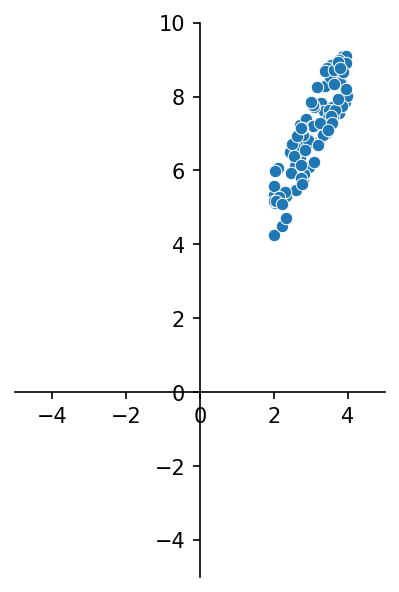

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
sns.scatterplot(x="x", y="y", data = df);
plt.axis("square")
ax.set_ylabel("")
ax.set_xlabel("");
plt.xlim(-5, 5)
plt.ylim(-5, 10);

Now let's perform PCA on this 2D dataset to see what transformations are involved.

Step 1 of PCA is to center the data matrix.

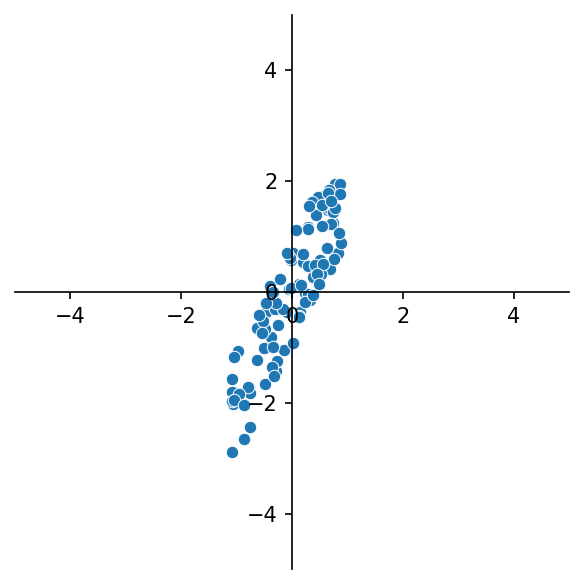

In [4]:
centered_df = df - np.mean(df, axis = 0)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
sns.scatterplot(x="x", y="y", data = centered_df);
plt.axis("square")
ax.set_ylabel("")
ax.set_xlabel("");
plt.xlim(-5, 5)
plt.ylim(-5, 5);

Step 2 is to obtain the SVD of the centered data.

In [5]:
U, S, Vt = np.linalg.svd(centered_df, full_matrices = False)

We mentioned that $V$ transforms $X$ to get the principal components. What does that tranformation look like?

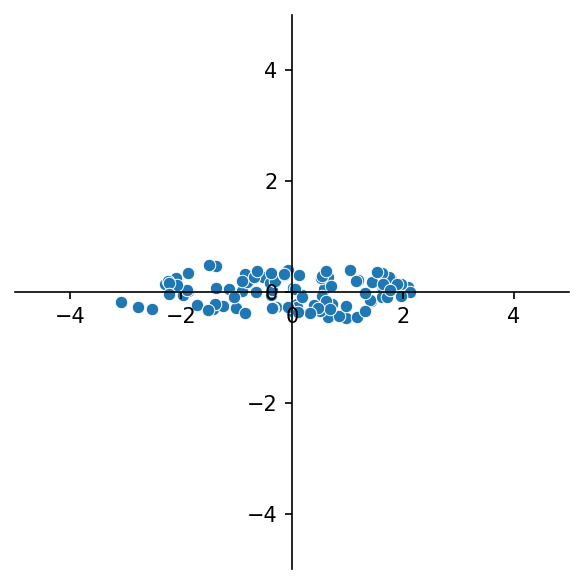

In [6]:
PCs = centered_df @ Vt.T

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
sns.scatterplot(x=0, y=1, data = PCs);
plt.axis("square")
ax.set_ylabel("")
ax.set_xlabel("");
plt.xlim(-5, 5)
plt.ylim(-5, 5);

Turns out $V$ simply rotates the centered data matrix $X$ such that the direction with the most variation (i.e. the direction that's the most spread-out) is aligned with the x-axis!

</br>
</br>
</br>

## Congressional Vote Records

Let's examine how the House of Representatives (of the 116th Congress, 1st session) voted in the month of **September 2019**.

From the [U.S. Senate website](https://www.senate.gov/reference/Index/Votes.htm):

> Roll call votes occur when a representative or senator votes "yea" or "nay," so that the names of members voting on each side are recorded. A voice vote is a vote in which those in favor or against a measure say "yea" or "nay," respectively, without the names or tallies of members voting on each side being recorded.

The data, compiled from ProPublica [source](https://github.com/eyeseast/propublica-congress), is a "skinny" table of data where each record is a single vote by a member across any roll call in the 116th Congress, 1st session, as downloaded in February 2020. The member of the House, whom we'll call **legislator**, is denoted by their bioguide alphanumeric ID in http://bioguide.congress.gov/.

In [7]:
# February 2019 House of Representatives roll call votes
# Downloaded using https://github.com/eyeseast/propublica-congress
votes = pd.read_csv('data/votes.csv')
votes = votes.astype({"roll call": str}) 
votes

,chamber,session,roll call,member,vote
0,House,1,555,A000374,Not Voting
1,House,1,555,A000370,Yes
2,House,1,555,A000055,No
3,House,1,555,A000371,Yes
4,House,1,555,A000372,No
...,...,...,...,...,...
17823,House,1,515,Y000062,Yes
17824,House,1,515,Y000065,No
17825,House,1,515,Y000033,Yes
17826,House,1,515,Z000017,Yes


Suppose we pivot this table to group each legislator and their voting pattern across every (roll call) vote in this month. We mark 1 if the legislator voted Yes (yea), and 0 otherwise (No/nay, no vote, speaker, etc.).

In [8]:
def was_yes(s):
    return 1 if s.iloc[0] == "Yes" else 0
    
vote_pivot = votes.pivot_table(index='member', 
                                columns='roll call', 
                                values='vote', 
                                aggfunc=was_yes, 
                                fill_value=0)
print(vote_pivot.shape)
vote_pivot.head()    

(441, 41)


roll call,515,516,517,518,519,520,521,522,523,524,...,546,547,548,549,550,551,552,553,554,555
member,,,,,,,,,,,,,,,,,,,,,
A000055,1,0,0,0,1,1,0,1,1,1,...,0,0,1,0,0,1,0,0,1,0
A000367,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,1,1,0,1
A000369,1,1,0,0,1,1,0,1,1,1,...,0,0,1,0,0,1,0,0,1,0
A000370,1,1,1,1,1,0,1,0,0,0,...,1,1,1,1,1,0,1,1,1,1
A000371,1,1,1,1,1,0,1,0,0,0,...,1,1,1,1,1,0,1,1,1,1


How do we analyze this data?

While we could consider loading information about the legislator, such as their party, and see how this relates to their voting pattern, it turns out that we can do a lot with PCA to cluster legislators by how they vote.

### PCA

In [9]:
vote_pivot_centered = vote_pivot - np.mean(vote_pivot, axis = 0)
vote_pivot_centered.head(5)

roll call,515,516,517,518,519,520,521,522,523,524,...,546,547,548,549,550,551,552,553,554,555
member,,,,,,,,,,,,,,,,,,,,,
A000055,0.129252,-0.668934,-0.526077,-0.52381,0.049887,0.587302,-0.562358,0.634921,0.594104,0.560091,...,-0.521542,-0.526077,0.045351,-0.521542,-0.519274,0.54195,-0.521542,-0.535147,0.086168,-0.503401
A000367,-0.870748,-0.668934,-0.526077,-0.52381,-0.950113,-0.412698,-0.562358,-0.365079,-0.405896,-0.439909,...,-0.521542,0.473923,0.045351,0.478458,0.480726,-0.45805,0.478458,0.464853,-0.913832,0.496599
A000369,0.129252,0.331066,-0.526077,-0.52381,0.049887,0.587302,-0.562358,0.634921,0.594104,0.560091,...,-0.521542,-0.526077,0.045351,-0.521542,-0.519274,0.54195,-0.521542,-0.535147,0.086168,-0.503401
A000370,0.129252,0.331066,0.473923,0.47619,0.049887,-0.412698,0.437642,-0.365079,-0.405896,-0.439909,...,0.478458,0.473923,0.045351,0.478458,0.480726,-0.45805,0.478458,0.464853,0.086168,0.496599
A000371,0.129252,0.331066,0.473923,0.47619,0.049887,-0.412698,0.437642,-0.365079,-0.405896,-0.439909,...,0.478458,0.473923,0.045351,0.478458,0.480726,-0.45805,0.478458,0.464853,0.086168,0.496599


<br/><br/><br/><br/><br/><br/>

SLIDO QUESTION

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

In [10]:
vote_pivot_centered.shape

(441, 41)

In [11]:
u, s, vt = np.linalg.svd(vote_pivot_centered, full_matrices = False)

### PCA plot

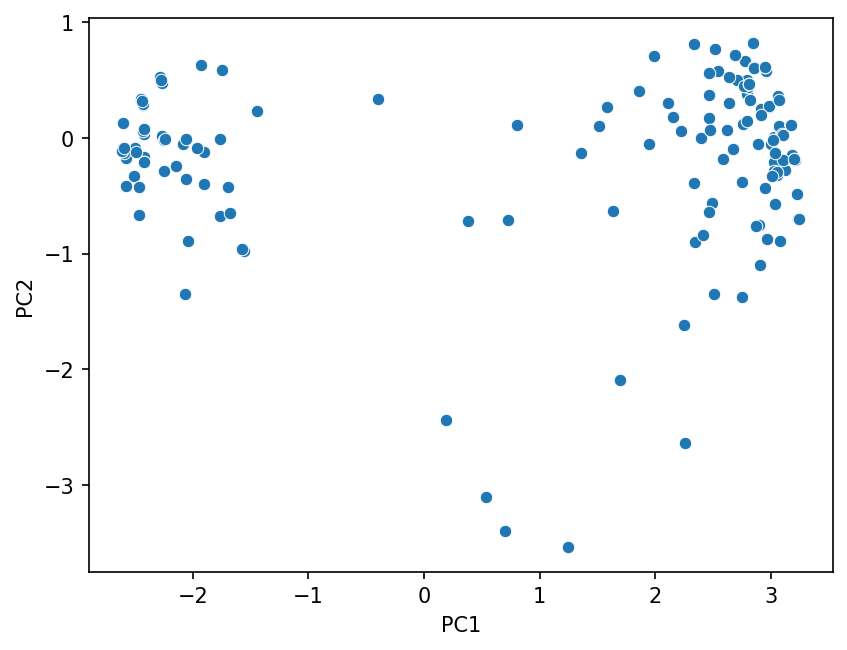

In [12]:
pcs = u * s
sns.scatterplot(x=pcs[:, 0], y=pcs[:, 1]);
plt.xlabel("PC1");
plt.ylabel("PC2");

### Component Scores

If the first two singular values are large and all others are small, then two dimensions are enough to describe most of what distinguishes one observation from another. If not, then a PCA scatter plot is omitting lots of information.

An equivalent way to evaluate this is to determine the **variance ratios**, i.e., the fraction of the variance each PC contributes to total variance.

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

SLIDO QUESTION

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

In [13]:
np.round(s**2 / sum(s**2), 2)

array([0.8 , 0.05, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

## Scree plot

A **scree plot** (and where its "elbow" is located) is a visual way of checking the distribution of variance.

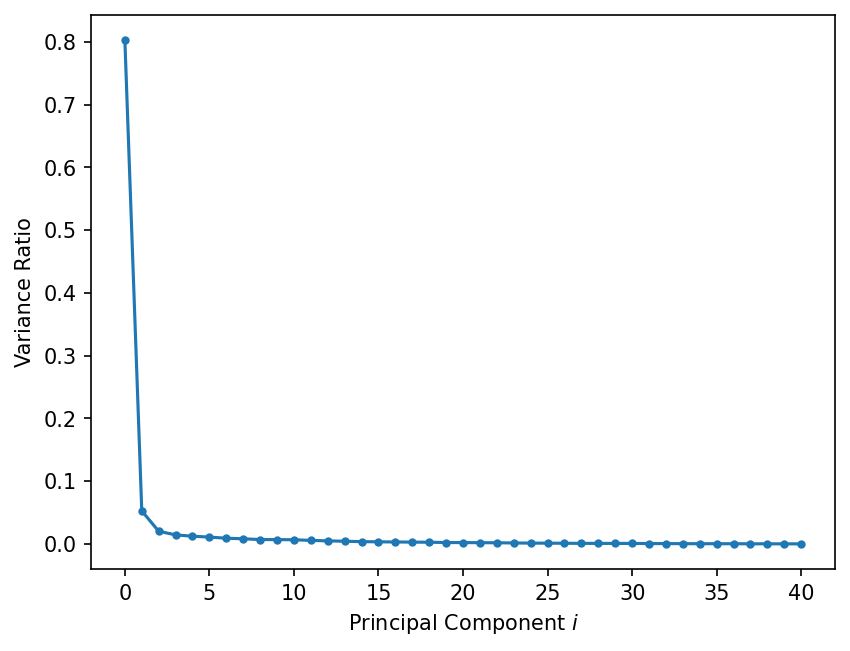

In [14]:
plt.plot(s**2 / sum(s**2), marker='.');
plt.xlabel("Principal Component $i$");
plt.ylabel("Variance Ratio");

Looks reasonable! Let's plot PC2 vs. PC1 again

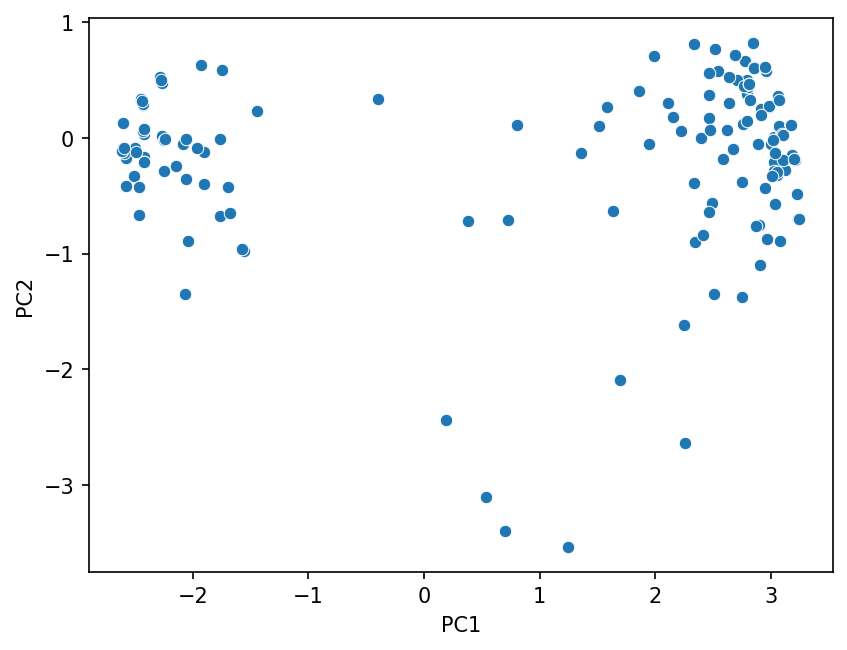

In [15]:
sns.scatterplot(x=pcs[:, 0], y=pcs[:, 1]);
plt.xlabel("PC1");
plt.ylabel("PC2");

Baesd on the plot above, it looks like there are two clusters of datapoints. What do you think this corresponds to?

## Incorporating Member Information

Suppose we load in more member information, from https://github.com/unitedstates/congress-legislators. This includes each legislator's political party.

In [16]:
base_url = 'https://raw.githubusercontent.com/unitedstates/congress-legislators/main/'
legislators_path = 'legislators-current.yaml'
f = fetch_and_cache(base_url + legislators_path, legislators_path)
legislators_data = yaml.safe_load(open('data/legislators-current.yaml'))

def to_date(s):
    return datetime.strptime(s, '%Y-%m-%d')

legs = pd.DataFrame(
    columns=['leg_id', 'first', 'last', 'gender', 'state', 'chamber', 'party', 'birthday'],
    data=[[x['id']['bioguide'], 
           x['name']['first'],
           x['name']['last'],
           x['bio']['gender'],
           x['terms'][-1]['state'],
           x['terms'][-1]['type'],
           x['terms'][-1]['party'],
           to_date(x['bio']['birthday'])] for x in legislators_data])

legs.set_index("leg_id")
legs.sort_index()

Downloading... Done!


,leg_id,first,last,gender,state,chamber,party,birthday
0,B000944,Sherrod,Brown,M,OH,sen,Democrat,1952-11-09
1,C000127,Maria,Cantwell,F,WA,sen,Democrat,1958-10-13
2,C000141,Benjamin,Cardin,M,MD,sen,Democrat,1943-10-05
3,C000174,Thomas,Carper,M,DE,sen,Democrat,1947-01-23
4,C001070,Robert,Casey,M,PA,sen,Democrat,1960-04-13
...,...,...,...,...,...,...,...,...
535,H001096,Harriet,Hageman,F,WY,rep,Republican,1962-10-18
536,R000618,Pete,Ricketts,M,NE,sen,Republican,1964-08-19
537,M001227,Jennifer,McClellan,F,VA,rep,Democrat,1972-12-28
538,B001320,Laphonza,Butler,F,CA,sen,Democrat,1979-05-11


<br/><br/>

---

Let's check out how party affiliations relate to the PC1, PC2 transformation from earlier:

First, let's see which party has negative PC1 scores.

In [17]:
vote2d = pd.DataFrame({
    'member': vote_pivot.index,
    'pc1': pcs[:, 0],
    'pc2': pcs[:, 1]
}).merge(legs, left_on='member', right_on='leg_id')

vote2d[vote2d['pc1'] < 0]['party'].value_counts()

party
Democrat      159
Republican      1
Name: count, dtype: int64

Hm let's keep checking things out. 

We didn't cover the query syntax that we use below, but if you're curious, check out the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html).

In [18]:
#top right only
vote2d.query('pc2 > -2 and pc1 > 0')['party'].value_counts()

party
Republican    130
Name: count, dtype: int64


<br/><br/>


Interesting. Let's use these party labels to color our principal components:

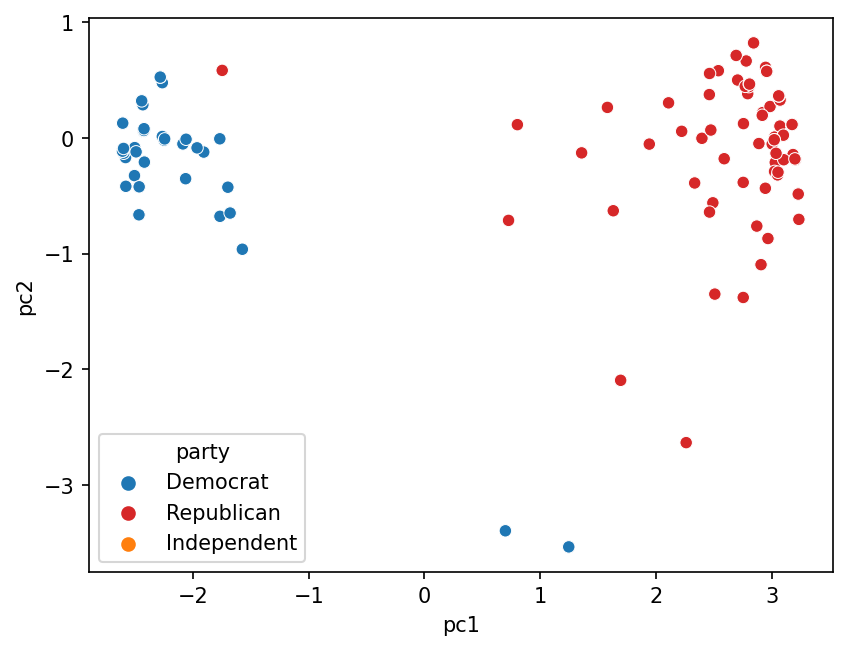

In [19]:

cp = sns.color_palette()
party_cp = [cp[i] for i in [0, 3, 1]]
party_hue = ["Democrat", "Republican", "Independent"]

sns.scatterplot(x="pc1", y="pc2",
                hue="party", palette=party_cp,  hue_order=party_hue,
                data = vote2d);

There seems to be a bunch of overplotting, so let's jitter a bit.

In [20]:
vote2d['pc1_jittered'] = vote2d['pc1'] + np.random.normal(loc = 0, scale = 0.1, size = vote2d.shape[0])
vote2d['pc2_jittered'] = vote2d['pc2'] + np.random.normal(loc = 0, scale = 0.1, size = vote2d.shape[0])

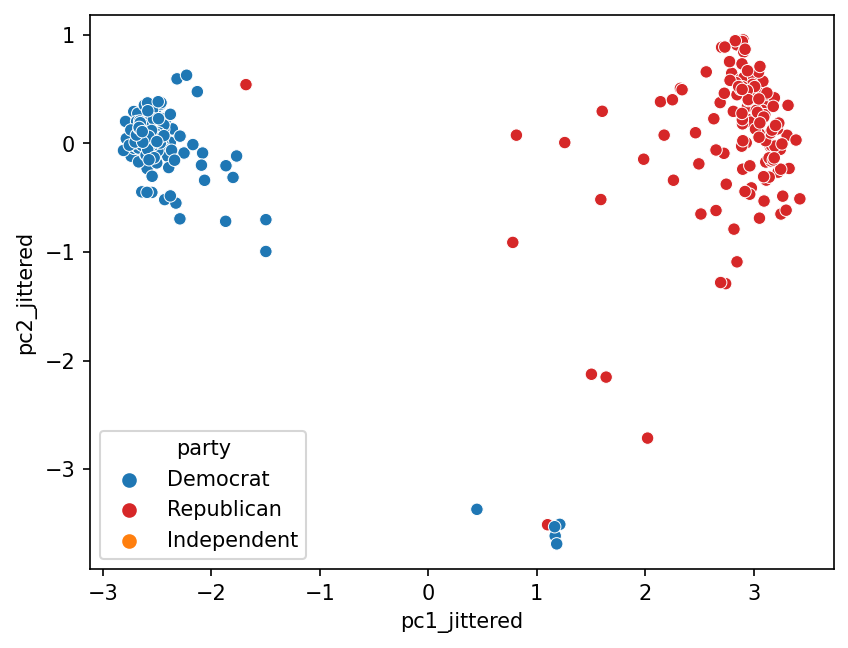

In [21]:
sns.scatterplot(x="pc1_jittered", y="pc2_jittered", 
                hue="party", palette=party_cp,  hue_order=party_hue,
                data = vote2d);

In [22]:
vote2d[vote2d['pc2'] < -1]

,member,pc1,pc2,leg_id,first,last,gender,state,chamber,party,birthday,pc1_jittered,pc2_jittered
34,B001311,1.695651,-2.093912,B001311,Dan,Bishop,M,NC,rep,Republican,1964-07-01,1.640872,-2.152473
36,C000537,0.699636,-3.394179,C000537,James,Clyburn,M,SC,rep,Democrat,1940-07-21,0.449013,-3.370045
50,C001087,2.755060,-1.378193,C001087,Eric,Crawford,M,AR,rep,Republican,1966-01-22,2.742951,-1.291846
108,G000582,2.262007,-2.632452,G000582,Jenniffer,González-Colón,F,PR,rep,Republican,1976-08-05,2.023020,-2.714146
126,H001077,2.509474,-1.349023,H001077,Clay,Higgins,M,LA,rep,Republican,1961-08-24,2.696794,-1.281663
138,J000299,2.908823,-1.094618,J000299,Mike,Johnson,M,LA,rep,Republican,1972-01-30,2.847605,-1.091153
192,M001210,1.695651,-2.093912,M001210,Gregory,Murphy,M,NC,rep,Republican,1963-03-05,1.505299,-2.126228
195,N000147,1.247134,-3.533196,N000147,Eleanor,Norton,F,DC,rep,Democrat,1937-06-13,1.213641,-3.508294
205,P000197,1.247134,-3.533196,P000197,Nancy,Pelosi,F,CA,rep,Democrat,1940-03-26,1.171035,-3.614799
213,P000610,1.247134,-3.533196,P000610,Stacey,Plaskett,F,VI,rep,Democrat,1966-05-13,1.184942,-3.688268


In [23]:
df = votes[votes['member'].isin(vote2d[vote2d['pc2'] < -1]['member'])]
df.groupby(['member', 'vote']).size()

member   vote      
B001311  No            17
         Yes            7
C000537  No             1
         Not Voting    37
         Yes            3
C001087  No             6
         Not Voting    23
         Yes           12
G000582  Not Voting     1
         Yes            6
H001077  No            14
         Not Voting    15
         Yes           12
J000299  No            20
         Not Voting     7
         Yes           14
M001210  No            16
         Not Voting     1
         Yes            7
N000147  No             6
         Not Voting     1
P000197  Speaker       41
P000610  No             7
R000600  Not Voting     7
S001177  No             7
dtype: int64

<br/>

We can check each of our legislators in the `legs` DataFrame, as below.



In [24]:
legs.query("leg_id == 'P000197'")

,leg_id,first,last,gender,state,chamber,party,birthday
125,P000197,Nancy,Pelosi,F,CA,rep,Democrat,1940-03-26


## Analysis: Regular Voters

Let's now look at **regulars**, whom we define as legislators who have voted above a certain threshold.

First, let's recompute the pivot table where we only consider Yes/No votes, and ignore records with "No Vote" or other entries.

In [25]:
bool_votes = votes["vote"].isin(["Yes", "No"])
num_yes_or_no_votes_per_member = votes[bool_votes].groupby("member").size()
num_yes_or_no_votes_per_member

member
A000055    40
A000367    41
A000369    41
A000370    41
A000371    41
           ..
W000827    33
Y000033    41
Y000062    41
Y000065    36
Z000017    41
Length: 437, dtype: int64

In [26]:
vote_pivot_with_yes_no_count = (
    vote_pivot.merge(num_yes_or_no_votes_per_member.to_frame(),
                     left_index = True, right_index = True, how="outer")
    .fillna(0)
    .rename(columns = {0: 'yes_no_count'})
)
vote_pivot_with_yes_no_count.head(5)

,515,516,517,518,519,520,521,522,523,524,...,547,548,549,550,551,552,553,554,555,yes_no_count
member,,,,,,,,,,,,,,,,,,,,,
A000055,1,0,0,0,1,1,0,1,1,1,...,0,1,0,0,1,0,0,1,0,40.0
A000367,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,1,1,0,1,41.0
A000369,1,1,0,0,1,1,0,1,1,1,...,0,1,0,0,1,0,0,1,0,41.0
A000370,1,1,1,1,1,0,1,0,0,0,...,1,1,1,1,0,1,1,1,1,41.0
A000371,1,1,1,1,1,0,1,0,0,0,...,1,1,1,1,0,1,1,1,1,41.0


In [27]:
thresh = 30
keep_legs = vote_pivot_with_yes_no_count["yes_no_count"] >= thresh
regulars = vote_pivot_with_yes_no_count[keep_legs]
regulars = regulars.drop(columns='yes_no_count')
regulars.shape

(425, 41)

<br/><br/>

## Regulars: PCA

Let's do some PCA on these regular voters. Remember: 1. Center data, then 2. Compute SVD.

In [28]:
regulars_centered = regulars - np.mean(regulars, axis = 0)
regulars_centered.head(5)

,515,516,517,518,519,520,521,522,523,524,...,546,547,548,549,550,551,552,553,554,555
member,,,,,,,,,,,,,,,,,,,,,
A000055,0.101176,-0.691765,-0.543529,-0.541176,0.023529,0.581176,-0.581176,0.625882,0.588235,0.550588,...,-0.541176,-0.545882,0.014118,-0.538824,-0.536471,0.529412,-0.538824,-0.555294,0.056471,-0.522353
A000367,-0.898824,-0.691765,-0.543529,-0.541176,-0.976471,-0.418824,-0.581176,-0.374118,-0.411765,-0.449412,...,-0.541176,0.454118,0.014118,0.461176,0.463529,-0.470588,0.461176,0.444706,-0.943529,0.477647
A000369,0.101176,0.308235,-0.543529,-0.541176,0.023529,0.581176,-0.581176,0.625882,0.588235,0.550588,...,-0.541176,-0.545882,0.014118,-0.538824,-0.536471,0.529412,-0.538824,-0.555294,0.056471,-0.522353
A000370,0.101176,0.308235,0.456471,0.458824,0.023529,-0.418824,0.418824,-0.374118,-0.411765,-0.449412,...,0.458824,0.454118,0.014118,0.461176,0.463529,-0.470588,0.461176,0.444706,0.056471,0.477647
A000371,0.101176,0.308235,0.456471,0.458824,0.023529,-0.418824,0.418824,-0.374118,-0.411765,-0.449412,...,0.458824,0.454118,0.014118,0.461176,0.463529,-0.470588,0.461176,0.444706,0.056471,0.477647


In [29]:
u, s, vt = np.linalg.svd(regulars_centered, full_matrices = False)

Check **component scores** to verify that using first two PCs is okay:

In [30]:
np.round(s**2 / sum(s**2), 2)

array([0.84, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

<br/><br/>Now, plot first two PCs.

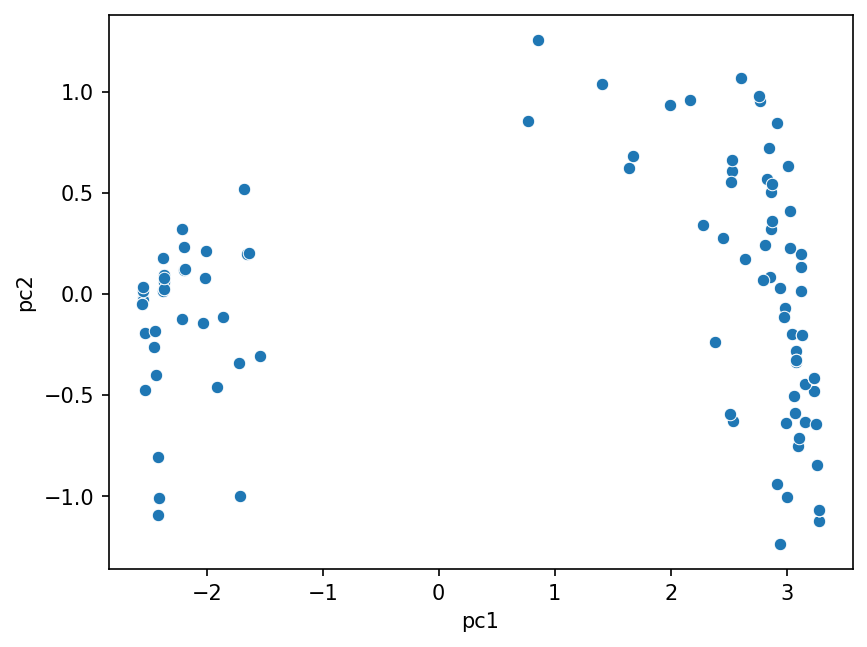

In [31]:
pcs_reg = u * s

vote2d_reg = pd.DataFrame({
    'member': regulars_centered.index,
    'pc1': pcs_reg[:, 0],
    'pc2': pcs_reg[:, 1],
}).merge(legs, left_on='member', right_on='leg_id')

sns.scatterplot(x="pc1", y="pc2", data=vote2d_reg);

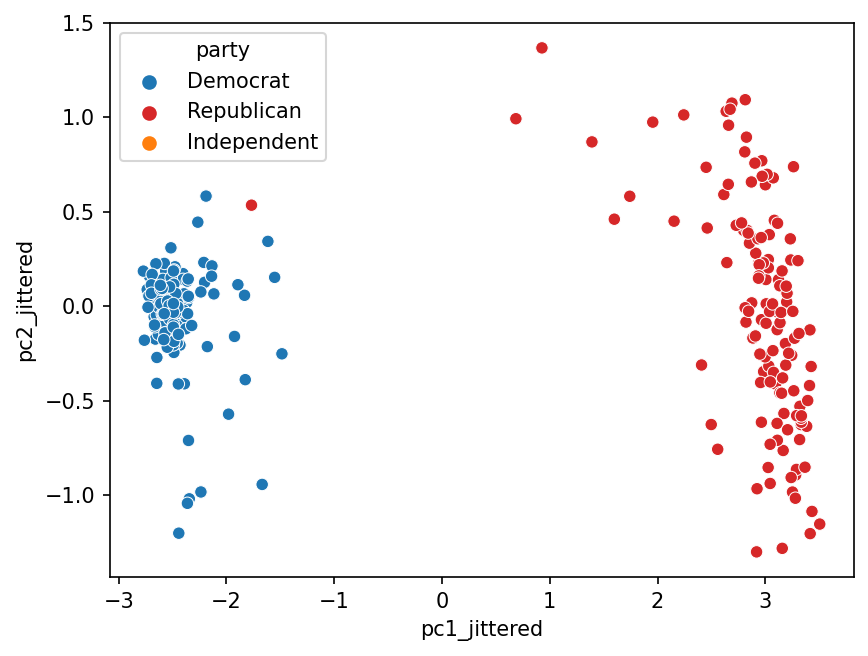

In [32]:
vote2d_reg['pc1_jittered'] = vote2d_reg['pc1'] + np.random.normal(loc = 0, scale = 0.1, size = vote2d_reg.shape[0])
vote2d_reg['pc2_jittered'] = vote2d_reg['pc2'] + np.random.normal(loc = 0, scale = 0.1, size = vote2d_reg.shape[0])

sns.scatterplot(x="pc1_jittered", y="pc2_jittered",
                hue="party", palette=party_cp,  hue_order=party_hue,
                data = vote2d_reg);

## Exploring $V^{\top}$

We can also look at Vt directly to try to gain insight into why each component is as it is.

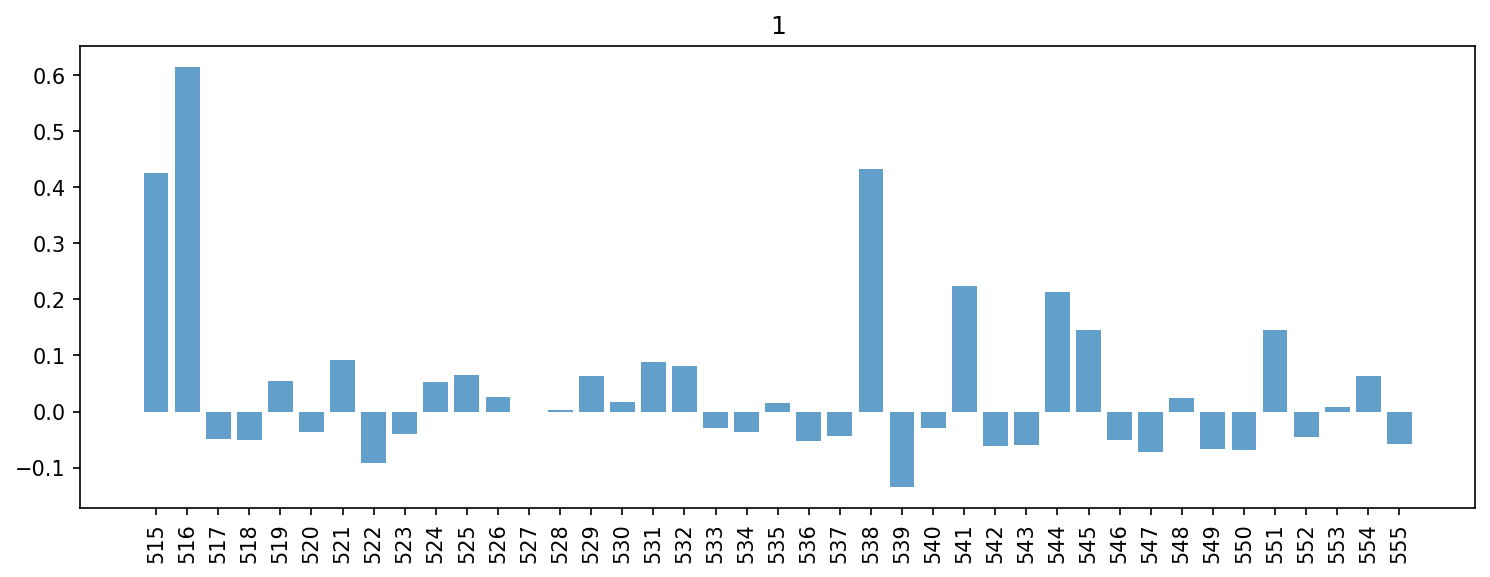

In [33]:
num_votes = vt.shape[1]
votes_cols = regulars.columns

def plot_pc(k):
    plt.bar(votes_cols, vt[k, :], alpha=0.7)
    plt.xticks(votes_cols, rotation=90);

with plt.rc_context({"figure.figsize": (12, 4)}):
    k = 1
    plot_pc(k)
    plt.title(k)


Using SVD for PCA may lead to hard to interpret $V^T$ matrices for two reasons:
1. Each row tends to include many many attributes. What does it mean that the first PC is driven by this specific set of 30 votes?
2. Later rows (i.e. less important PCs) will be driven more by the orthogonality constraint than the data itself.

There exists other methods for doing PCA, e.g. Sparse PCA, that will try to lead to an interpretable version of $V^T$.

In [34]:
vote2d_reg.shape

(288, 13)

## Biplot

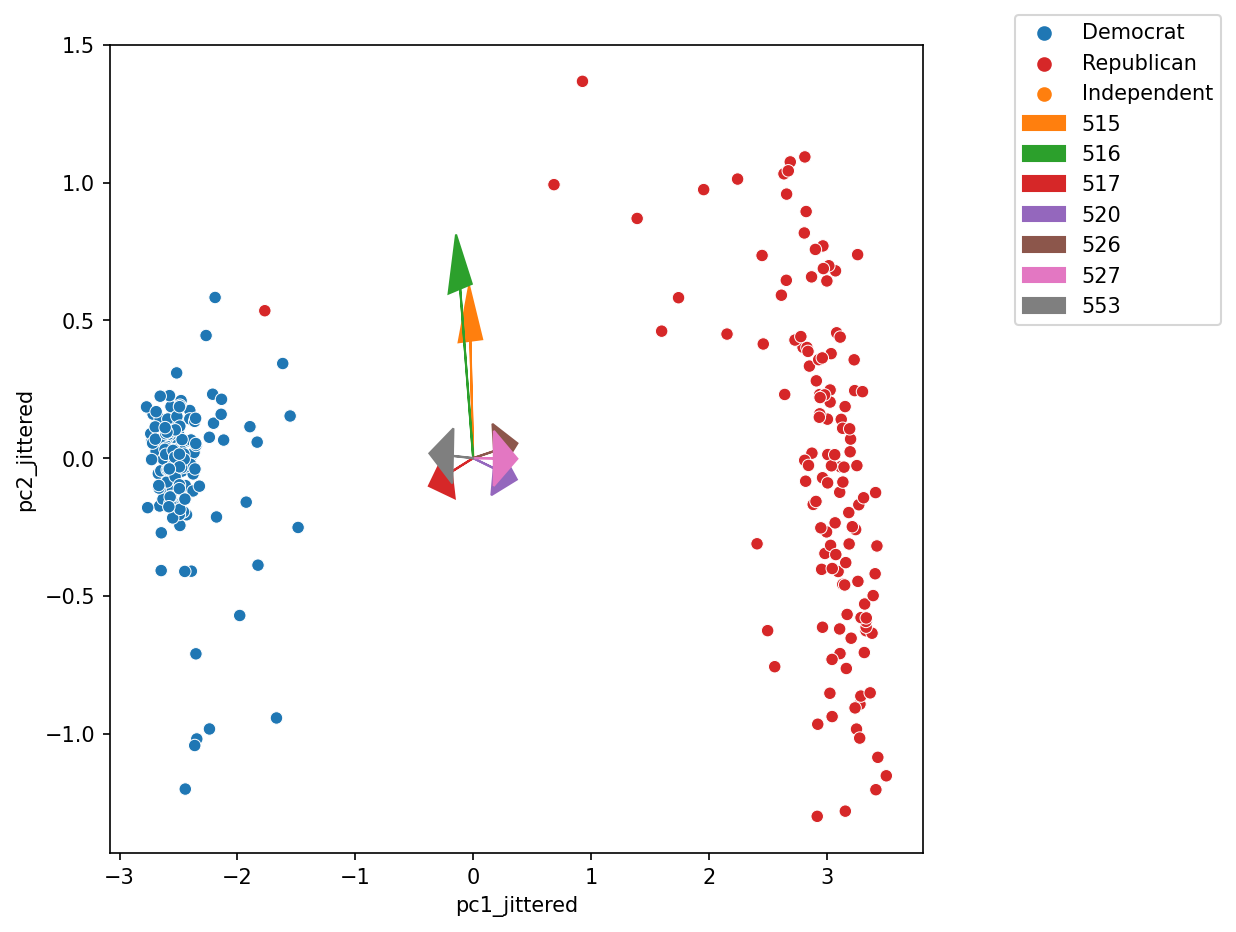

In [35]:
import random

# roll_calls = sorted([517, 520, 526, 527, 555, 553]) # features to plot on biplot
roll_calls = [515, 516, 517, 520, 526, 527, 553]


plt.figure(figsize = (7, 7))
# first plot each datapoint in terms of the first two principal components
sns.scatterplot(x="pc1_jittered", y="pc2_jittered",
                hue="party", palette=party_cp,  hue_order=party_hue,
                data = vote2d_reg);

# next, plot the loadings for PC1 and PC2
cp = sns.color_palette()[1:] # skip blue

directions_df= pd.DataFrame(data=vt[:2,:].T, index=regulars_centered.columns, columns=["dir1", "dir2"])
dir1, dir2 = directions_df["dir1"], directions_df["dir2"]
for i, feature in enumerate(roll_calls):
    feature = str(feature)
    plt.arrow(0, 0,
              dir1.loc[feature], dir2.loc[feature],
              head_width=0.2, head_length=0.2, color=cp[i], label=feature)
plt.legend(bbox_to_anchor=(1.1, 1.05));
plt.savefig("biplot.png", dpi = 200)

Each roll call from the 116th Congress - 1st Session: https://clerk.house.gov/evs/2019/ROLL_500.asp
* 555: Raising a question of the privileges of the House ([H.Res.590](https://www.congress.gov/bill/116th-congress/house-resolution/590))
* 553: [https://www.congress.gov/bill/116th-congress/senate-joint-resolution/54/actions]
* 527: On Agreeing to the Amendment [H.R.1146 - Arctic Cultural and Coastal Plain Protection Act](https://www.congress.gov/bill/116th-congress/house-bill/1146)